In [1]:
import numpy as np
import yfinance as yf
from utils import plot_returns

In [6]:
# Download S&P 500 front month futures data
prices = yf.download('ES=F', auto_adjust=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [8]:
# Calculate daily logarithmic returns
log_returns = np.log(prices).diff()

In [ ]:
# Annualize returns and volatility
annualized_return = log_returns*252
annualized_vol = log_returns.std() * np.sqrt(252)
# Download the 3-month Treasury bill rate as the risk-free rate
sp500_start_date = str(prices.index[0])[:10]
risk_free_rates = yf.download('^IRX', start=sp500_start_date, auto_adjust=False)['Adj Close']
avg_risk_free_rate = risk_free_rates.mean() / 100

[*********************100%***********************]  1 of 1 completed


In [15]:
# Calculate the Sharpe Ratio
sharpe_ratio = (annualized_return - avg_risk_free_rate) / annualized_vol
# Calculate the Sortino Ratio
downside_vol = log_returns[log_returns<0].std() * np.sqrt(252)
sortino_ratio = (annualized_return - avg_risk_free_rate) / downside_vol
# Calculate the Calmar Ratio
cum_returns = np.exp(log_returns.cumsum())
drawdowns = (cum_returns.cummax() - cum_returns) / cum_returns.cummax()
max_drawdown = np.max(drawdowns)
calmar_ratio = annualized_return / max_drawdown

In [16]:
print()
print(f"annualized_return: {np.round(annualized_return * 100, 1)}%")
print(f"avg_risk_free_rate: {np.round(avg_risk_free_rate * 100, 1)}%")
print(f"annualized_volatility: {np.round(annualized_vol * 100, 1)}%")
print(f"downside_volatility: {np.round(downside_vol * 100, 1)}%")
print(f"max_drawdown: {np.round(max_drawdown * 100, 1)}%")
print()
print(f"sharpe_ratio: {np.round(sharpe_ratio, 2)}")
print(f"sortino_ratio: {np.round(sortino_ratio, 2)}")
print(f"calmar_ratio: {np.round(calmar_ratio, 2)}")
print()


annualized_return: Ticker       ES=F
Date             
2025-07-04    NaN
2025-07-07  -30.1
2025-07-08  -16.1
2025-07-09  141.2
2025-07-10   67.8
2025-07-11  -96.8
2025-07-14   44.0
2025-07-15 -108.0
2025-07-16   77.1
2025-07-17  148.5
2025-07-18  -22.9
2025-07-21   39.7
2025-07-22    7.9
2025-07-23  195.8
2025-07-24   20.7
2025-07-25   92.3
2025-07-28   -8.8
2025-07-29  -65.8
2025-07-30  -38.4
2025-07-31  -86.8
2025-08-01 -437.7
2025-08-04  162.4%
avg_risk_free_rate: Ticker
^IRX    4.2
dtype: float64%
annualized_volatility: Ticker
ES=F    8.4
dtype: float64%
downside_volatility: Ticker
ES=F    8.0
dtype: float64%
max_drawdown: 2.5%

sharpe_ratio: Ticker      ES=F  ^IRX
Date                  
2025-07-04   NaN   NaN
2025-07-07   NaN   NaN
2025-07-08   NaN   NaN
2025-07-09   NaN   NaN
2025-07-10   NaN   NaN
2025-07-11   NaN   NaN
2025-07-14   NaN   NaN
2025-07-15   NaN   NaN
2025-07-16   NaN   NaN
2025-07-17   NaN   NaN
2025-07-18   NaN   NaN
2025-07-21   NaN   NaN
2025-07-22   NaN   NaN

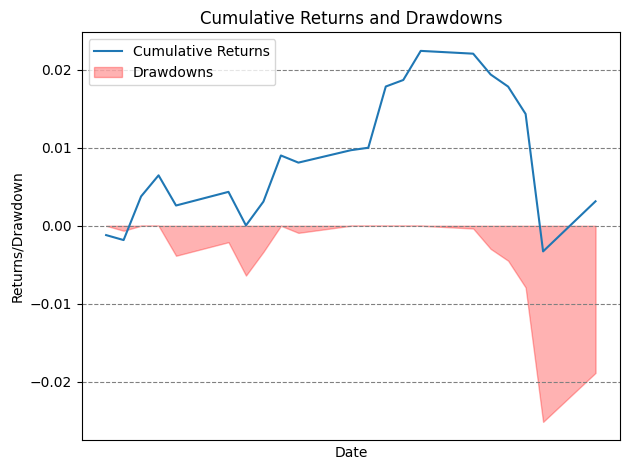

In [14]:
plot_returns(log_returns.squeeze())